In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [2]:
dataPath = "MNIST_Autoencoder_CollectedData_FINAL"
ioExpPath = "%s/030917_RecollectIOExperiments" %dataPath
repLayerPath = "%s/030917_RecollectBottleneckExperiments" %dataPath
colsPath = "%s/030917_HidingColumns" %dataPath
sqPath = "%s/030917_HidingSquares" %dataPath

# IO Formulations Experiments

In [3]:
data_test_costs_LtoR = np.load('%s/mnist_data_test_costs_ncols_LtoR.npy' %ioExpPath)
data_train_costs_LtoR = np.load('%s/mnist_data_train_costs_ncols_LtoR.npy' %ioExpPath)
data_mses_test_generated_LtoR = np.load('%s/mnist_data_mses_test_generated_LtoR.npy' %ioExpPath)
data_mses_train_generated_LtoR = np.load('%s/mnist_data_mses_train_generated_LtoR.npy' %ioExpPath)
data_mses_testSplits_LtoR = np.load('%s/mnist_data_mses_testSplits_ncols_LtoR.npy' %ioExpPath)

splitMeans_LtoR = np.mean(data_mses_testSplits_LtoR)
splitStddev_LtoR = np.std(data_mses_testSplits_LtoR)

data_test_costs_LtoO = np.load('%s/mnist_data_test_costs_ncols_LtoO.npy' %ioExpPath)
data_train_costs_LtoO = np.load('%s/mnist_data_train_costs_ncols_LtoO.npy' %ioExpPath)
data_mses_test_generated_LtoO = np.load('%s/mnist_data_mses_test_generated_LtoO.npy' %ioExpPath)
data_mses_train_generated_LtoO = np.load('%s/mnist_data_mses_train_generated_LtoO.npy' %ioExpPath)
data_mses_testSplits_LtoO = np.load('%s/mnist_data_mses_testSplits_ncols_LtoO.npy' %ioExpPath)

splitMeans_LtoO = np.mean(data_mses_testSplits_LtoO)
splitStddev_LtoO = np.std(data_mses_testSplits_LtoO)

data_test_costs_BtoO = np.load('%s/mnist_data_test_costs_ncols_BtoO.npy' %ioExpPath)
data_train_costs_BtoO = np.load('%s/mnist_data_train_costs_ncols_BtoO.npy' %ioExpPath)
data_mses_test_generated_BtoO = np.load('%s/mnist_data_mses_test_generated_BtoO.npy' %ioExpPath)
data_mses_train_generated_BtoO = np.load('%s/mnist_data_mses_train_generated_BtoO.npy' %ioExpPath)
data_mses_testSplits_BtoO = np.load('%s/mnist_data_mses_testSplits_ncols_BtoO.npy' %ioExpPath)

splitMeans_BtoO = np.mean(data_mses_testSplits_BtoO)
splitStddev_BtoO = np.std(data_mses_testSplits_BtoO)

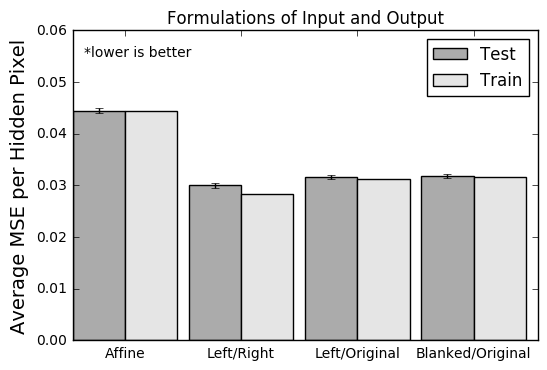

In [26]:
N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.45       # the width of the bars

fig, ax = plt.subplots()

io_test_means = (0.0444815655232, data_test_costs_LtoR, data_mses_test_generated_LtoO, data_mses_test_generated_BtoO)
io_test_stddev = (0.000466409634915, splitStddev_LtoR, splitStddev_LtoO, splitStddev_BtoO)  
#rects1 = ax.bar(ind, io_test_means, width, color='#F19545', yerr=io_test_stddev)
rects1 = ax.bar(ind, io_test_means, width, color='#ababab', yerr=io_test_stddev, ecolor='#000000')

io_train_means = (0.0443399315466, data_train_costs_LtoR, data_mses_train_generated_LtoO, data_mses_train_generated_BtoO)
#rects2 = ax.bar(ind + width, io_train_means, width, color='#F8D3B6')
rects2 = ax.bar(ind + width, io_train_means, width, color='#e5e5e5')

# add some text for labels, title and axes ticks
plt.ylabel("Average MSE per Hidden Pixel", fontsize=14)
ax.set_title('Formulations of Input and Output')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Affine', 'Left/Right', 'Left/Original', 'Blanked/Original'))
ax.legend((rects1[0], rects2[0]), ('Test', 'Train'))

plt.ylim([0,0.06])
ax.text(0.1, 0.055, '*lower is better', fontsize=10)

# plt.savefig('Fig_io_formulations.png', dpi=400)
plt.show()


# Representation Layer Size

In [27]:
data_test_costs_bottleneck = np.load('%s/mnist_data_test_costs_ncols_bottleneck.npy' %repLayerPath)
data_train_costs_bottleneck = np.load('%s/mnist_data_train_costs_ncols_bottleneck.npy' %repLayerPath)
data_mses_testSplits_bottleneck = np.load('%s/mnist_data_mses_testSplits_ncols_bottleneck.npy' %repLayerPath)

splitMeans_bottleneck = np.zeros(28)
splitStddev_bottleneck = np.zeros(28)
for i in range(28):
    splitMeans_bottleneck[i] = np.mean(data_mses_testSplits_bottleneck[i])
    splitStddev_bottleneck[i] = np.std(data_mses_testSplits_bottleneck[i])

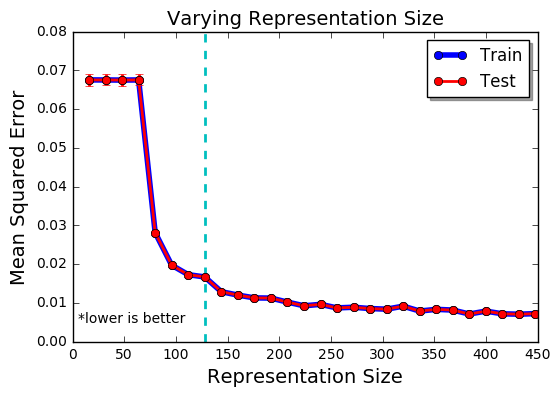

In [29]:
# plot test accuracy
fig, ax = plt.subplots()

plt.figure(1)

x_bottleneck = np.arange(16, 464, 16)
plt.plot((128, 128), (0, 0.08), 'c--', linewidth=2.0)
plt.plot(x_bottleneck, data_test_costs_bottleneck, '-o', alpha=1.0, c='b',label='Train', linewidth=4.0)
plt.plot(x_bottleneck, splitMeans_bottleneck, '-o', alpha=1.0, c='r',label="Test", linewidth=2.0)
plt.errorbar(x_bottleneck, splitMeans_bottleneck, yerr=splitStddev_bottleneck, linestyle='', c='r', linewidth=2.0)

legend = ax.legend(loc='upper right', shadow=True)

plt.autoscale(enable=True, axis='x', tight=False)
plt.autoscale(enable=True, axis='y', tight=False)
plt.ylim([0,0.08])

ax.text(5, 0.005, '*lower is better', fontsize=10)

plt.title("Varying Representation Size", fontsize=14)
plt.ylabel("Mean Squared Error", fontsize=14)
plt.xlabel("Representation Size", fontsize=14)
# plt.savefig('representationlayer.png', dpi=400)
plt.show()

# Hiding Columns

In [30]:
# Autoencoder 
data_test_costs_columns = np.load('%s/data_test_costs_columns.npy' %colsPath)
data_train_costs_columns = np.load('%s/data_train_costs_columns.npy' %colsPath)
data_mses_testSplits_columns = np.load('%s/data_mses_testSplits_columns.npy' %colsPath)

splitMeans_columns = np.zeros(28)
splitStddev_columns = np.zeros(28)
for i in range(28):
    splitMeans_columns[i] = np.mean(data_mses_testSplits_columns[i])
    splitStddev_columns[i] = np.std(data_mses_testSplits_columns[i])
    
print data_train_costs_columns

[  1.55526308e-05   1.64619109e-04   7.92828901e-04   2.76410393e-03
   6.89513031e-03   2.28443313e-03   3.89086991e-03   5.90432407e-03
   9.61221457e-03   1.20711505e-02   1.55764509e-02   2.06628926e-02
   2.42632404e-02   2.82092646e-02   3.27734262e-02   3.74666810e-02
   4.23564017e-02   4.84982155e-02   5.58427170e-02   6.34021759e-02
   6.96064830e-02   7.40223438e-02   8.14491332e-02   7.83994853e-02
   7.53392592e-02   7.24753201e-02   6.97670937e-02   6.72847286e-02]


In [31]:
# from MSE_columns_square_sizes.ipynb
# MSE generated results
train_mmse_removecols = np.load('%s/mmse_hideColumns_train.npy' %colsPath)
splitTest_mmse_removecols = np.load('%s/mmse_hideColumns_testSplits.npy' %colsPath)

test_mmse_means_removecols = np.zeros(28)
test_mmse_stddevs_removecols = np.zeros(28)
for i in range(28):
    test_mmse_means_removecols[i] = np.mean(splitTest_mmse_removecols[i])
    test_mmse_stddevs_removecols[i] = np.std(splitTest_mmse_removecols[i])

# these data points used above for i/o formulation
print train_mmse_removecols[13]
print test_mmse_means_removecols[13]
print test_mmse_stddevs_removecols[13]

# random guessing of average training image
train_mmse_avgImage_removecols = np.load('%s/mmse_avgImage_hideColumns_train.npy' %colsPath)
splitTest_mmse_avgImage_removecols = np.load('%s/mmse_avgImage_hideColumns_testSplits.npy' %colsPath)

test_mmse_means_avgImage_removecols = np.zeros(28)
test_mmse_stddevs_avgImage_removecols = np.zeros(28)
for i in range(28):
    test_mmse_means_avgImage_removecols[i] = np.mean(splitTest_mmse_avgImage_removecols[i])
    test_mmse_stddevs_avgImage_removecols[i] = np.std(splitTest_mmse_avgImage_removecols[i])

0.0443399315466
0.0444815655232
0.000466409634915


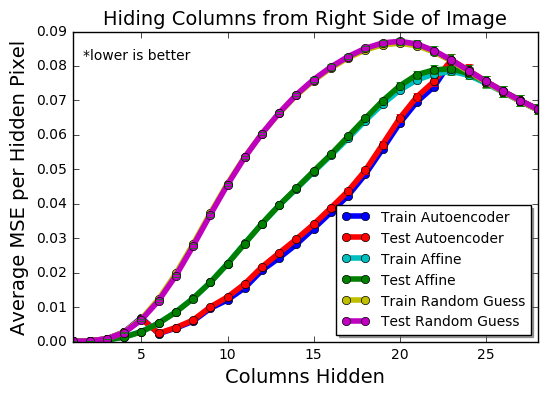

In [33]:
# plot test accuracy 
fig, ax = plt.subplots()
plt.figure(1)

numColsIdxs = np.arange(1,29)

plt.plot(numColsIdxs, data_train_costs_columns, '-o', c='b', label='Train Autoencoder', linewidth=4.0)
plt.plot(numColsIdxs, splitMeans_columns, '-o', c='r', label='Test Autoencoder', linewidth=4.0)
plt.errorbar(numColsIdxs, splitMeans_columns, yerr=splitStddev_columns, linestyle='', c='r', linewidth=4.0)

plt.plot(numColsIdxs, train_mmse_removecols, '-o', c='c', label='Train Affine', linewidth=4.0)
plt.plot(numColsIdxs, test_mmse_means_removecols, '-o', c='g', label='Test Affine', linewidth=4.0)
plt.errorbar(numColsIdxs, test_mmse_means_removecols, yerr=test_mmse_stddevs_removecols, linestyle='', c='g', linewidth=4.0)

plt.plot(numColsIdxs, train_mmse_avgImage_removecols, '-o', c='y', label='Train Random Guess', linewidth=4.0)
plt.plot(numColsIdxs, test_mmse_means_avgImage_removecols, '-o', c='m', label='Test Random Guess', linewidth=4.0)
plt.errorbar(numColsIdxs, test_mmse_means_avgImage_removecols, yerr=test_mmse_stddevs_removecols, linestyle='', c='g', linewidth=4.0)

legend = ax.legend(loc='best', shadow=True, fontsize=10)

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=False)
plt.ylim([0,0.09])

ax.text(1.6, 0.082, '*lower is better', fontsize=10)

plt.title("Hiding Columns from Right Side of Image", fontsize=14)
plt.ylabel("Average MSE per Hidden Pixel", fontsize=14)
plt.xlabel("Columns Hidden", fontsize=14)
# plt.savefig('hidecolumns_mse.png', dpi=400)
plt.show()


# Hiding Squares

In [34]:
# autoencoder
data_test_costs_squares = np.load('%s/data_test_costs_square.npy' %sqPath)
data_train_costs_squares = np.load('%s/data_train_costs_square.npy' %sqPath)
data_mses_testSplits_squares = np.load('%s/data_mses_testSplits_square.npy' %sqPath)

splitMeans_squares = np.zeros(13)
splitStddev_squares = np.zeros(13)
for i in range(13):
    splitMeans_squares[i] = np.mean(data_mses_testSplits_squares[i])
    splitStddev_squares[i] = np.std(data_mses_testSplits_squares[i])
    
print splitMeans_squares[2]
print data_train_costs_squares[2]

0.0437931489901
0.0391673982143


In [35]:
# from MSE_columns_square_sizes.ipynb
# MMSE estimator
train_mmse_removecenter = np.load('%s/mmse_hideSquares_train.npy' %sqPath)
splitTest_mmse_removecenter = np.load('%s/mmse_hideSquares_testSplits.npy' %sqPath)

test_mmse_means_removecenter = np.zeros(14)
test_mmse_stddevs_removecenter = np.zeros(14)
for i in range(14):
    test_mmse_means_removecenter[i] = np.mean(splitTest_mmse_removecenter[i])
    test_mmse_stddevs_removecenter[i] = np.std(splitTest_mmse_removecenter[i])

# avg training image
train_mmse_avgImage_removecenter = np.load('%s/mmse_avgImage_hideSquares_train.npy' %sqPath)
splitTest_mmse_avgImage_removecenter = np.load('%s/mmse_avgImage_hideSquares_testSplits.npy' %sqPath)

test_mmse_avgImage_means_removecenter = np.zeros(14)
test_mmse_avgImage_stddevs_removecenter = np.zeros(14)
for i in range(14):
    test_mmse_avgImage_means_removecenter[i] = np.mean(splitTest_mmse_avgImage_removecenter[i])
    test_mmse_avgImage_stddevs_removecenter[i] = np.std(splitTest_mmse_avgImage_removecenter[i])

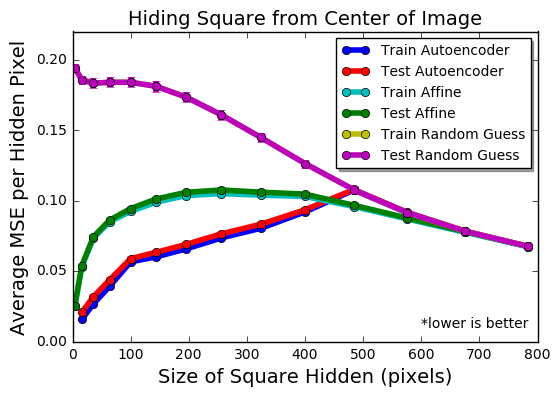

In [37]:
# plot test accuracy 
fig, ax = plt.subplots()
plt.figure(1)
squareAreas = np.multiply(np.arange(2,30,2),np.arange(2,30,2))
squareAreas2 = np.multiply(np.arange(4, 30, 2),np.arange(4, 30, 2))

plt.plot(squareAreas2, data_train_costs_squares, '-o', c='b', label='Train Autoencoder', linewidth=4.0)
plt.plot(squareAreas2, splitMeans_squares, '-o', c='r', label='Test Autoencoder', linewidth=4.0)
plt.errorbar(squareAreas2, splitMeans_squares, yerr=splitStddev_squares, linestyle='', c='r', linewidth=4.0)

plt.plot(squareAreas, train_mmse_removecenter, '-o', c='c', label='Train Affine', linewidth=4.0)
plt.plot(squareAreas, test_mmse_means_removecenter, '-o', c='g', label='Test Affine', linewidth=4.0)
plt.errorbar(squareAreas, test_mmse_means_removecenter, yerr=test_mmse_stddevs_removecenter, linestyle='', c='g', linewidth=4.0)

plt.plot(squareAreas, test_mmse_avgImage_means_removecenter, '-o', c='y', label='Train Random Guess', linewidth=4.0)
plt.plot(squareAreas, test_mmse_avgImage_means_removecenter, '-o', c='m', label='Test Random Guess', linewidth=4.0)
plt.errorbar(squareAreas, test_mmse_avgImage_means_removecenter, yerr=test_mmse_avgImage_stddevs_removecenter, linestyle='', c='m', linewidth=4.0)

legend = ax.legend(loc='best', shadow=True, fontsize=10)
plt.ylim([0,0.22])

ax.text(600, 0.01, '*lower is better', fontsize=10)

plt.title("Hiding Square from Center of Image", fontsize=14)
plt.ylabel("Average MSE per Hidden Pixel", fontsize=14)
plt.xlabel("Size of Square Hidden (pixels)", fontsize=14)
# plt.savefig('removingsquares_mse.png', dpi=400)
plt.show()


In [38]:
print splitMeans_squares

[ 0.02070229  0.03186328  0.04379315  0.05881828  0.06332801  0.06898218
  0.07640315  0.08321868  0.093475    0.10788136  0.09155576  0.07823113
  0.06752467]
